In [1]:
#import dataset, american electric power temporal data (hourly)
import pandas as pd
import matplotlib.pyplot as plt
# Hourly Total Energy Consumption
# import AEP_hourly.csv
df = pd.read_csv('AEP_hourly.csv', parse_dates=[0], index_col=0)

df.head(24)


,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
2004-12-31 06:00:00,13038.0
2004-12-31 07:00:00,13692.0
2004-12-31 08:00:00,14297.0
2004-12-31 09:00:00,14719.0


<Axes: title={'center': 'AEP'}, xlabel='Datetime'>

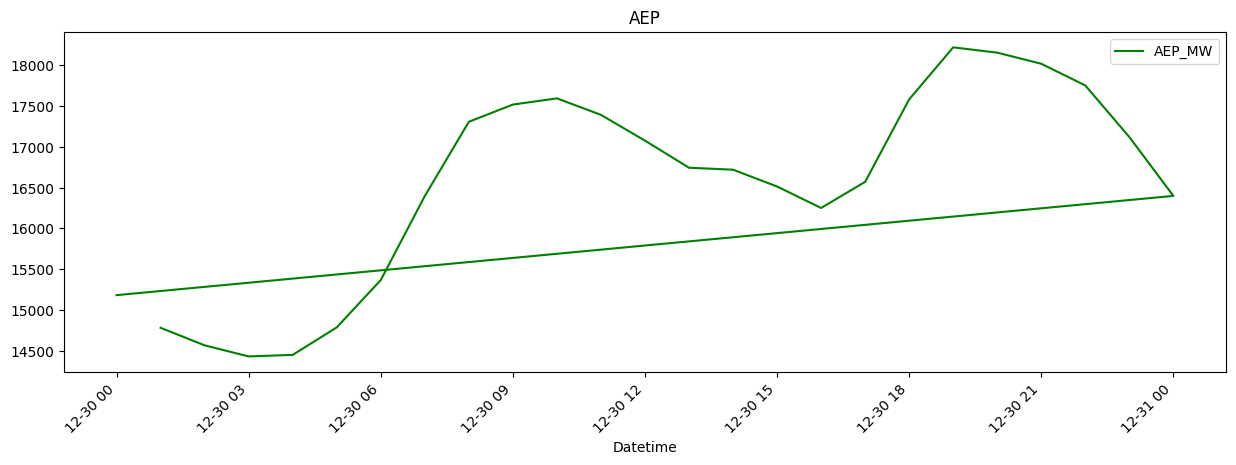

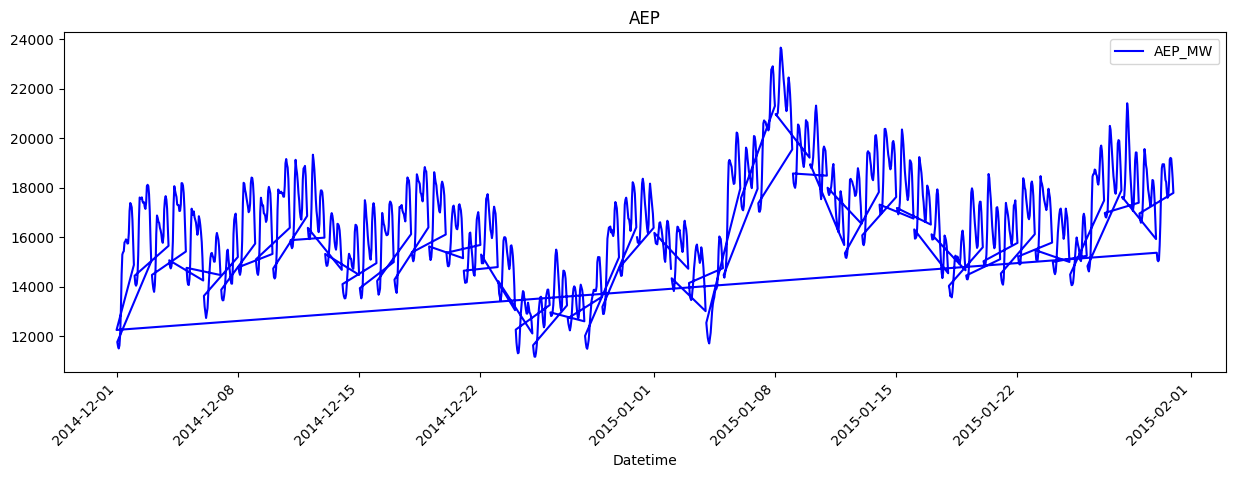

In [2]:
# plot sample data, plot data for two days, two months and check seasonality patterns, do you find and type of seasonality (daily, weekly, monthly)

#two days
#hint: use df.query()
df_sample_two_days = df.query('Datetime >= "2014-12-30" and Datetime <= "2014-12-31"')
# plot the sample data
df_sample_two_days.plot(figsize=(15,5), color='green', title='AEP', rot=45)

#two month

df_sample_two_months = df.query('Datetime >= "2014-12-01" and Datetime <= "2015-01-31"')
df_sample_two_months.plot(figsize=(15,5), color='blue', title='AEP', rot=45)


In [3]:
#Split time series into train and valid sets: use < 2017-01-01 for training, otherwise for testing

df.reset_index(inplace=True)

# define train range
train_range = df['Datetime'] < '2017-01-01'

# copy time series from the range
train_set = df[train_range].copy()

# define test range, use >= 2017-01-01 for testing
valid_range = df['Datetime'] >= '2017-01-01'

# copy time series from the range
valid_set = df[valid_range].copy()

print('length of training sequence:', len(train_set))
print('length of testing sequence:', len(valid_set))

length of training sequence: 107377
length of testing sequence: 13896


In [4]:
# extract features from 'Datetime' column: pandas.Period see https://pandas.pydata.org/docs/reference/api/pandas.Period.html
# features to be used :hour, dayofweek month, year, dayofyear and dayofmonth features


def create_features(df, label=None):
    df['hour'] = df['Datetime'].dt.hour
    df['dayofweek'] = df['Datetime'].dt.dayofweek
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofyear'] = df['Datetime'].dt.dayofyear
    df['dayofmonth'] = df['Datetime'].dt.day
    
    # drop 'Datetime' column
    X = df[['hour','dayofweek','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        
    return X, y

# apply feature extraction, use 'AEP_MW' as label    
X_train, y_train = create_features(train_set, label='AEP_MW')
X_valid, y_valid = create_features(valid_set, label='AEP_MW')

# check the features
X_train.head()

,hour,dayofweek,month,year,dayofyear,dayofmonth
0,1,4,12,2004,366,31
1,2,4,12,2004,366,31
2,3,4,12,2004,366,31
3,4,4,12,2004,366,31
4,5,4,12,2004,366,31


In [5]:
#train XGBoost and valid it, use 2000 estimators learning_rate= 0.005,
# tune the parameters to achieve better training performance (check accuracy metric)
from xgboost import XGBRegressor, plot_importance, plot_tree

# see documentation: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
# define XGBRegressor
model = XGBRegressor(n_estimators=2000, learning_rate=0.005, early_stopping_rounds=50)

# fit the model 
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-rmse:2592.02681	validation_1-rmse:2529.46426
[1]	validation_0-rmse:2583.87821	validation_1-rmse:2522.03756
[2]	validation_0-rmse:2575.78343	validation_1-rmse:2514.71950
[3]	validation_0-rmse:2567.74975	validation_1-rmse:2507.49333
[4]	validation_0-rmse:2559.76360	validation_1-rmse:2500.25519
[5]	validation_0-rmse:2551.83778	validation_1-rmse:2493.04654
[6]	validation_0-rmse:2543.96063	validation_1-rmse:2485.92843
[7]	validation_0-rmse:2536.14481	validation_1-rmse:2478.88015
[8]	validation_0-rmse:2528.37481	validation_1-rmse:2471.88632
[9]	validation_0-rmse:2520.66431	validation_1-rmse:2465.03859
[10]	validation_0-rmse:2512.99937	validation_1-rmse:2458.16703
[11]	validation_0-rmse:2505.39413	validation_1-rmse:2451.32757
[12]	validation_0-rmse:2497.83406	validation_1-rmse:2444.59325
[13]	validation_0-rmse:2490.32948	validation_1-rmse:2437.79737
[14]	validation_0-rmse:2482.87424	validation_1-rmse:2431.22340
[15]	validation_0-rmse:2475.46904	validation_1-rmse:2424.60245
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

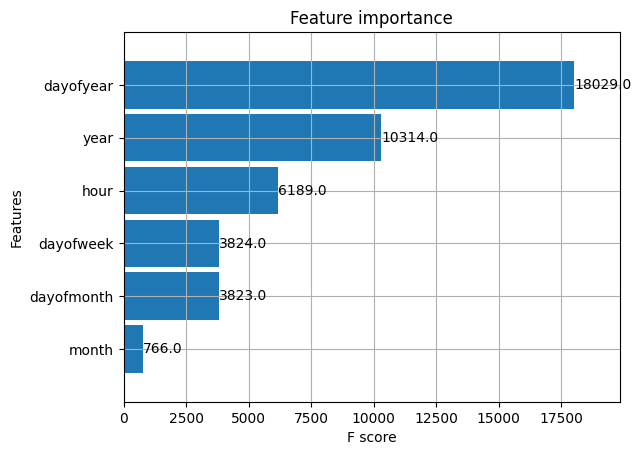

In [6]:
#plot feature importance
plot_importance(model, height=0.9)

In [7]:
#test the trained XGBoost on valid_set
# hint use model.predict(), see https://xgboost.readthedocs.io/en/release_1.0.0/python/python_api.html
predictions = model.predict(X_valid)

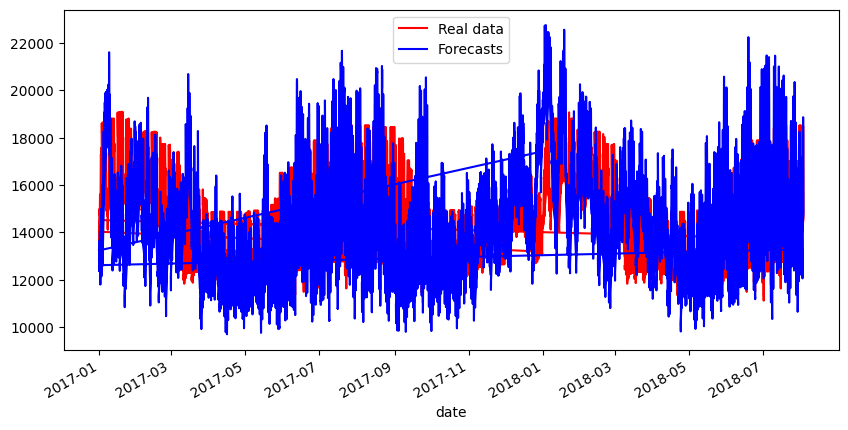

In [8]:
#plot real against forecasts:
# create a dataframe with the following columns: 'date', 'real' and  'forecasts'

Plot_df = pd.DataFrame({"date": valid_set['Datetime'], "real": y_valid, "forecasts": predictions})
figure, ax = plt.subplots(figsize=(10, 5))
# plot real data against forecasts
Plot_df.set_index('date')['forecasts'].plot(ax=ax, color='red')
Plot_df.set_index('date')['real'].plot(ax=ax, color='blue')

plt.legend(["Real data", "Forecasts"])
plt.show()

In [9]:
# check model accuracy using mean_absolute_percentage_error metric
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_valid, predictions))

Mean Absolute Percentage Error: 0.08500170933043938


In [17]:
# apply Prophet on the same data
#rename columns to 'ds' and 'y'
ts = pd.DataFrame()
ts['ds'] = df['Datetime']
ts['y'] = df['AEP_MW']
ts

,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [18]:
# define training and validation sets..
# < '2017-01-01' for training 
# '2017-01-01' & ds < '2018-01-01' for testing
# use df.query()
p_train = ts.query('ds < "2017-01-01"')
p_valid = ts.query('ds >= "2017-01-01" and ds < "2018-01-01"')
#p_valid = ts.loc[ts['ds'] >= '2017-01-01'] 

print('length of training set:\n',len(p_train))
print('length of validation set:\n',len(p_valid))

length of training set:
 107377
length of validation set:
 8760


In [ ]:
#build and train Prophet:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

#change trend, changepoints values to improve the performance:
# see doc here https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.forecasting.fbprophet.Prophet.html
# set the parameters: seasonality_mode, n_changepoints, daily_seasonality

m = Prophet(seasonality_mode='multiplicative', n_changepoints=10, daily_seasonality=True)  
    
m.fit(p_train)

11:37:16 - cmdstanpy - INFO - Chain [1] start processing
11:37:30 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
#create forecasts for one year and plot predictions against real data..
# set forecasting horizon: use period= 365*24 and freq='H'
future = m.make_future_dataframe(periods=365*24, freq='H')
#predict using the trained model
forecasts = m.predict(future)
forecasts[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']]

c:\Projetos\time_series_ikileus\.venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2004-10-01 01:00:00,12723.584338,10757.868394,14584.079999,15605.858250,15605.858250,15605.858250
1,2004-10-01 02:00:00,12121.772405,10148.072557,14159.595318,15605.638995,15605.638995,15605.638995
2,2004-10-01 03:00:00,11770.762594,9708.848563,13650.943743,15605.419740,15605.419740,15605.419740
3,2004-10-01 04:00:00,11718.604205,9854.031678,13724.944525,15605.200485,15605.200485,15605.200485
4,2004-10-01 05:00:00,11996.028250,9953.344165,13947.233255,15604.981230,15604.981230,15604.981230
...,...,...,...,...,...,...,...
107346,2016-12-30 19:00:00,16191.393039,11675.661173,20632.410785,14172.090283,10456.843174,17737.241454
107347,2016-12-30 20:00:00,16264.404334,11454.761743,20576.473543,14172.044568,10456.276168,17737.650706
107348,2016-12-30 21:00:00,16097.598231,11465.600952,20432.803209,14171.998852,10455.709162,17738.059959
107349,2016-12-30 22:00:00,15618.495070,11261.554949,19970.291812,14171.953137,10455.142155,17738.469211


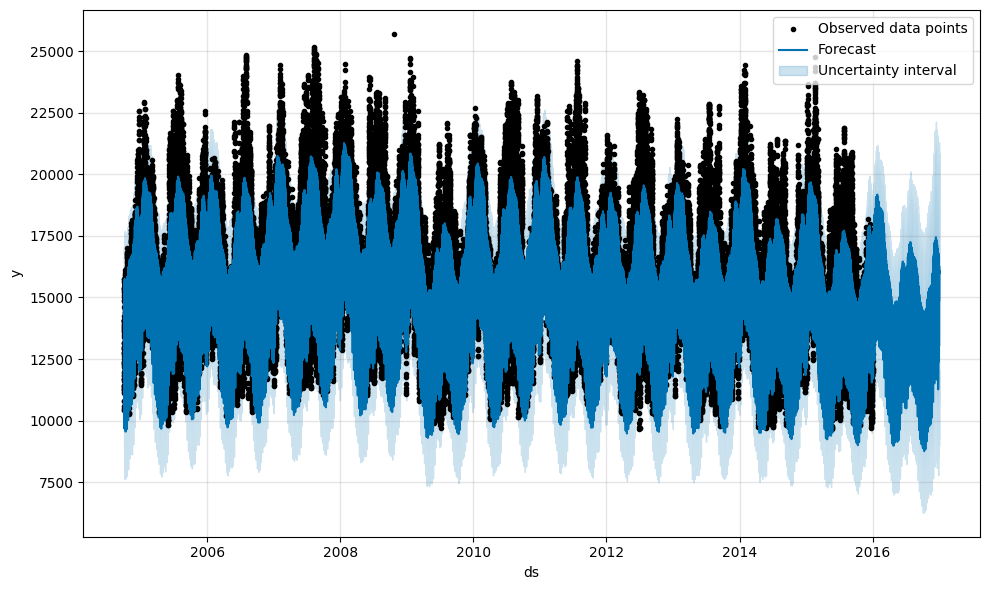

In [14]:
# plot the forecasts 
# hint use model.plot, see https://facebook.github.io/prophet/docs/quick_start.html#python-api
fig = m.plot(forecasts, include_legend=True)

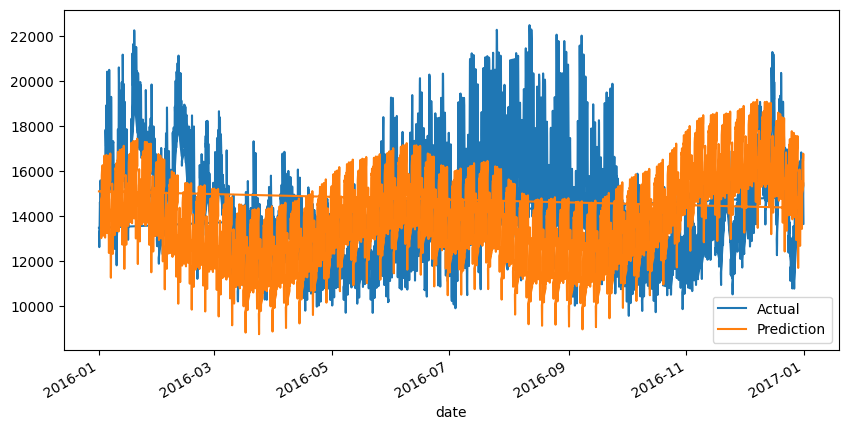

In [15]:
# extract the forecasts and compare to real data:
# hint: indices may cause array error  >> reset the index using reset_index(drop=True)
# use forecasts.loc
pred = forecasts.loc[forecasts['ds'] >= '2016-01-01'].reset_index(drop=True)
dates = list(pd.to_datetime(p_valid['ds'])) # real dates
#plot_predictions(dates, valid['y'], pred['yhat'])
# extract real data: 'y'. Set the index using reset_index(drop=True)
real_data = p_valid['y'].reset_index(drop=True)
Plot_df_P = pd.DataFrame({"date": dates, "actual":real_data, "forecasts": pred['yhat']})
figure, ax = plt.subplots(figsize=(10, 5))
Plot_df_P.plot(ax=ax, label="Actual", x="date", y="actual")
Plot_df_P.plot(ax=ax, label="Forecasts", x="date", y="forecasts")
plt.legend(["Actual", "Prediction"])
plt.show()

In [ ]:
# calculate prediction error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def evaluate_model(y_valid, forecasts):
    # print mean_absolute_error
    print('Mean Absolute Error:', mean_absolute_error(y_valid, forecasts))

    # print mean_squared_error
    print('Mean Squared Error:', mean_squared_error(y_valid, forecasts))

    # print mean_absolute_percentage_error
    print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_valid, forecasts))

# Align the lengths of real_data and pred['yhat']
min_length = min(len(real_data), len(pred['yhat']))

evaluate_model(real_data[:min_length], pred['yhat'][:min_length])

Mean Absolute Error: 2185.512835004941
Mean Squared Error: 7505086.913018466
Mean Absolute Percentage Error: 0.14552663093354284
